In [1]:
import numpy as np
import itk
import matplotlib.pyplot as plt
itk.MultiThreaderBase.SetGlobalDefaultNumberOfThreads(8)

In [2]:
stack = np.load("../matrices/DOWNSAMPLED-FULL-STACK.npy")

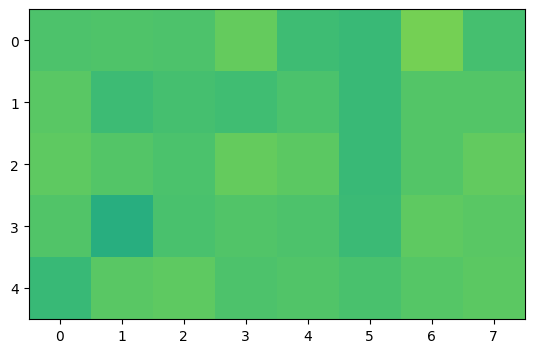

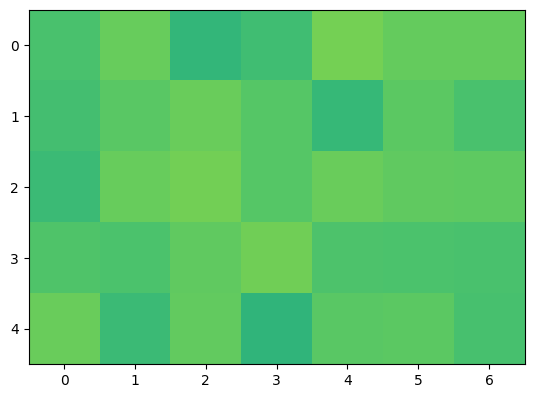

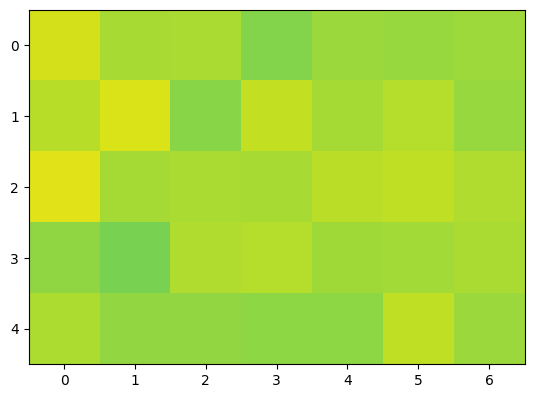

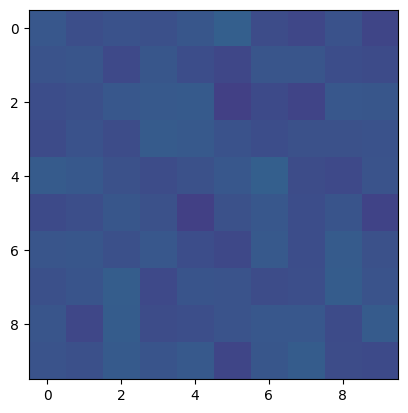

In [3]:
mat1 = stack[80:85,122:130,150]
mat2 = stack[97:102,150:157,500]
mat3 = stack[97:102,150:157,800]
bg = stack[10:20, 10:20, 150]

plt.imshow(mat1, vmin=9000, vmax=13000)
plt.show()
plt.imshow(mat2, vmin=9000, vmax=13000)
plt.show()
plt.imshow(mat3, vmin=9000, vmax=13000)
plt.show()
plt.imshow(bg, vmin=9000, vmax=13000)
plt.show()


In [4]:
image = itk.image_view_from_array(stack)
seed_points = [(83, 125, 150), (100, 153, 500), (100, 153, 800), (15, 15, 150)]
#index_type = itk.Index[3]
#seed_indices = [index_type(point) for point in seed_points]

means = [11628.95114612, 11893.44039962, 12323.64763356, 10019.69581148]
stdevs = [148.517306, 151.834364, 195.760220, 130.134522]

In [5]:
# confidence_connected_filter = cc_filter
cc_filter = itk.ConfidenceConnectedImageFilter.New(image)
print("Initialized")
cc_filter.SetInitialNeighborhoodRadius(1)
print("Radius set")
cc_filter.SetMultiplier(2.5)
print("Multiplier Set")
cc_filter.SetNumberOfIterations(3)
print("Iterations Set")

for seed, variance in zip(seed_points, stdevs):
    seed_point = itk.Index[3]
    seed_point= seed_point(seed)
    cc_filter.AddSeed(seed_point)
    cc_filter.SetMultiplier(variance)
    print("Seed set")
print("Seed complete, start update")
cc_filter.Update()
print("update complete")

Initialized
Radius set
Multiplier Set
Iterations Set
Seed set
Seed set
Seed set
Seed set
Seed complete, start update
update complete


In [8]:
segmented_image = cc_filter.GetOutput()

In [9]:
segmented_data = itk.array_view_from_image(segmented_image)

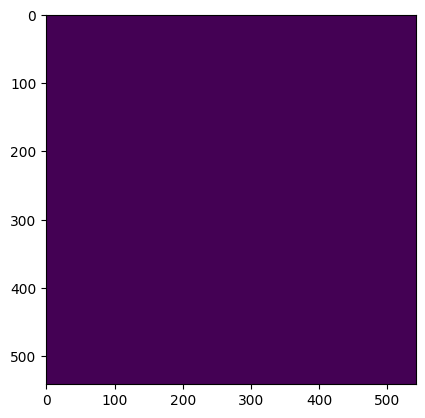

In [11]:
plt.imshow(segmented_data[:,:,300])
plt.show()